In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import pickle
sys.path.append(os.pardir)
from datasets.mnist import load_mnist
from matplotlib.pyplot import imshow

In [28]:
(X_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

In [29]:
print(X_train.shape)
print(t_train.shape)
print(X_train.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(60000, 784)
(10000,)


5
(784,)
(28, 28)


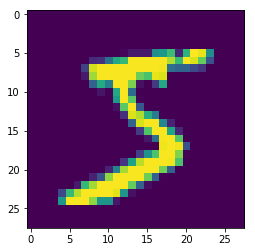

In [30]:
label = t_train[0]
print(label)
img = X_train[0]
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)
imshow(img)

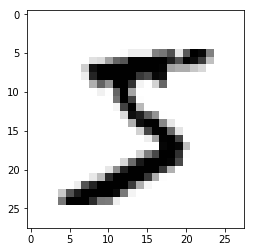

In [31]:
def plot_image(img):
    fig = plt.gcf()
    fig.set_size_inches(4, 4)
    plt.imshow(img, cmap = 'binary')
    plt.show()

plot_image(img)

In [32]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [33]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

In [34]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

In [35]:
def init_network():
    with open('../datasets/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
    return network

In [36]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [37]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i, j in enumerate(x):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
print('Accuracy: ' + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


# 批次處理

In [38]:
x, t = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(x.shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)
batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i: i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt +=np.sum(p == t[i: i + batch_size])
print('Accuracy: ' + str(float(accuracy_cnt) / len(x)))

(10000, 784)
(784, 50)
(50, 100)
(100, 10)
Accuracy: 0.9352
